# Dataset

In [10]:
from keras.datasets import mnist
(X, y), (X_test, y_test) = mnist.load_data(path="mnist.npz")

In [11]:
X.shape, y.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [12]:
X = X.reshape((60000, 28*28))/255
X_test = X_test.reshape((10000, 28*28))/255

In [13]:
import numpy as np
y_mu = np.zeros((X.shape[0], 2))

# Model

In [14]:
from keras import layers, Model, Input, activations
from keras.optimizers import Adam
from keras import losses
from keras import ops
import tensorflow as tf
import keras

In [15]:
# Encodeur
encodeur_input = Input(shape=(784, ))
x = layers.Dense(128, activation=activations.relu)(encodeur_input)
x = layers.Dense(8, activation=activations.relu)(x)
mu = layers.Dense(2)(x)
logvar = layers.Dense(2)(x)
z = mu + keras.random.normal(shape = (1, ops.shape(mu)[1]))*ops.exp(0.5*logvar)
encodeur = Model(encodeur_input, z)

# Décodeur
decodeur_input = Input(shape=(2,))
x = layers.Dense(8, activation=activations.relu)(decodeur_input)
x = layers.Dense(128, activation=activations.relu)(x)
decodeur_output = layers.Dense(784, activation="sigmoid")(x)
decodeur = Model(decodeur_input, decodeur_output)

# Autoencodeur variationnel
autoencodeur_variationnel = Model(inputs = encodeur_input,
                                  outputs = [decodeur(encodeur(encodeur_input)), mu, ops.exp(logvar)-1, logvar])

In [16]:
autoencodeur_variationnel.compile(optimizer=Adam(learning_rate=0.001),
                                  loss=["mse", "mse", "mae", "mae"], loss_weights=[1000, 1, 1, 1])

In [17]:
history = autoencodeur_variationnel.fit(X, [X, y_mu, y_mu, y_mu],
                              batch_size=256,
                              epochs=50,
                              validation_split=0.1)

Epoch 1/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - dense_10_loss: 0.1702 - dense_9_loss: 5.4281 - functional_4_loss: 0.0807 - loss: 86.4762 - subtract_1_loss: 0.2183 - val_dense_10_loss: 0.0199 - val_dense_9_loss: 0.8691 - val_functional_4_loss: 0.0646 - val_loss: 65.5114 - val_subtract_1_loss: 0.0198
Epoch 2/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - dense_10_loss: 0.0236 - dense_9_loss: 0.6365 - functional_4_loss: 0.0607 - loss: 61.4083 - subtract_1_loss: 0.0236 - val_dense_10_loss: 0.0325 - val_dense_9_loss: 0.5070 - val_functional_4_loss: 0.0549 - val_loss: 55.4191 - val_subtract_1_loss: 0.0322
Epoch 3/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - dense_10_loss: 0.0225 - dense_9_loss: 0.3701 - functional_4_loss: 0.0535 - loss: 53.8727 - subtract_1_loss: 0.0225 - val_dense_10_loss: 0.0142 - val_dense_9_loss: 0.3754 - val_functional_4_loss: 0.0514 - val_loss: 51.6963 - val_subtract_1_loss: 0.0142
Epoch 4/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - dense_10_loss: 0.0061 - dens

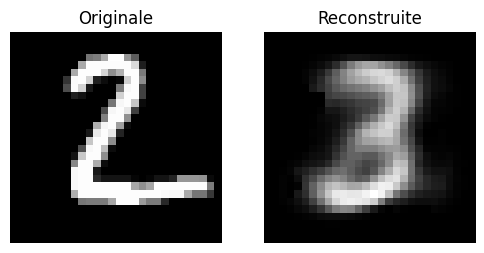

In [18]:
import matplotlib.pyplot as plt
X_pred = autoencodeur_variationnel.predict(X_test)[0]
from IPython.display import clear_output

for i in range (len(X_pred)) :
    plt.figure(figsize=(6,3))  # taille du canvas (largeur, hauteur)

    # Image originale
    plt.subplot(1, 2, 1)   # 1 ligne, 2 colonnes, 1er subplot
    plt.imshow(X_test[i].reshape((28, 28)), cmap="gray")
    plt.title("Originale")
    plt.axis("off")

    # Image reconstruite
    plt.subplot(1, 2, 2)   # 1 ligne, 2 colonnes, 2e subplot
    plt.imshow(X_pred[i].reshape((28, 28)), cmap="gray")
    plt.title("Reconstruite")
    plt.axis("off")

    plt.show()

    choix = input("Continuer ? (o/n) : ")

    if choix.lower() == "n":
        break

    clear_output(wait=True)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 662us/step


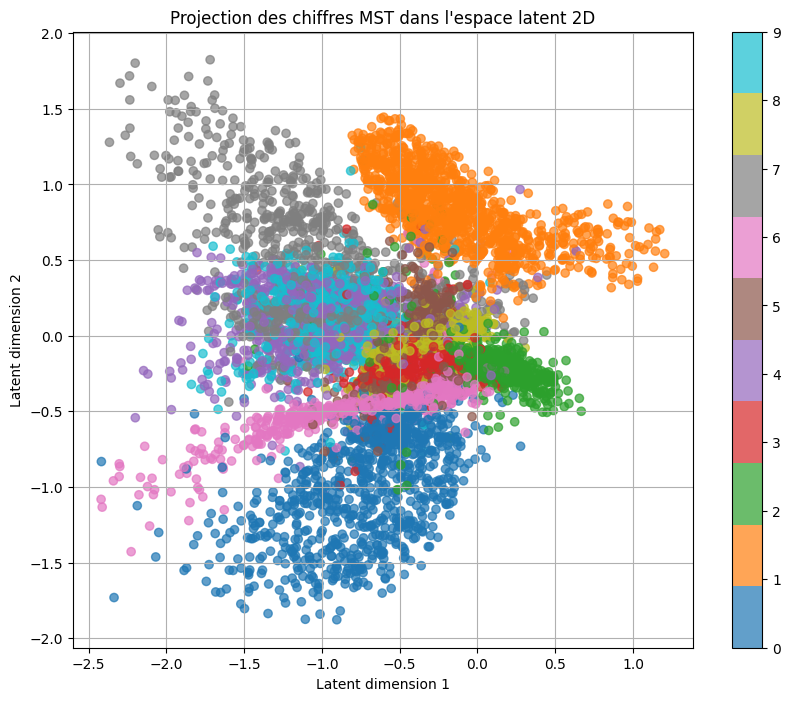

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# 5. Encoder les données de test
X_test_latent = encodeur.predict(X_test)

# 6. Scatter plot avec couleur selon les labels y_test
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_test_latent[:, 0], X_test_latent[:, 1], c=y_test, cmap='tab10', alpha=0.7)
plt.colorbar(scatter, ticks=range(10))
plt.title("Projection des chiffres MST dans l'espace latent 2D")
plt.xlabel("Latent dimension 1")
plt.ylabel("Latent dimension 2")
plt.grid(True)
plt.show()